In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/TwoLayers.csv")

In [3]:
df

,t,x
0,112.682447,29.734906
1,113.100490,32.612783
2,116.062501,35.625211
3,116.171738,38.366331
4,117.547707,41.243263
5,118.583361,44.394653
6,121.226062,47.407396
7,121.623098,50.559417
8,123.297369,53.710177
9,124.045224,56.450667


In [4]:
df["x"]= 30 + 3*np.arange(12)
df

,t,x
0,112.682447,30
1,113.100490,33
2,116.062501,36
3,116.171738,39
4,117.547707,42
5,118.583361,45
6,121.226062,48
7,121.623098,51
8,123.297369,54
9,124.045224,57


$$t = \frac{ \sqrt{x^2+4h_1^2}}{ V_1}$$

$$t^2 = \frac{ 1}{V_1^2 }x^2 + \frac{ 4h_1^2}{ V_1^2}$$

In [5]:
df["t^2"] = df["t"]**2
df["x^2"] = df["x"]**2
df

,t,x,t^2,x^2
0,112.682447,30,12697.333918,900
1,113.100490,33,12791.720813,1089
2,116.062501,36,13470.504028,1296
3,116.171738,39,13495.872663,1521
4,117.547707,42,13817.463486,1764
5,118.583361,45,14062.013421,2025
6,121.226062,48,14695.758189,2304
7,121.623098,51,14792.177919,2601
8,123.297369,54,15202.241218,2916
9,124.045224,57,15387.217654,3249


(0.0, 130.0)

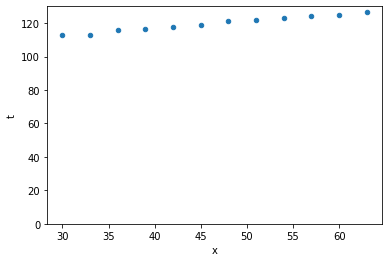

In [7]:
df.plot.scatter(x="x", y="t")
plt.ylim([0,130])

<AxesSubplot:xlabel='x^2', ylabel='t^2'>

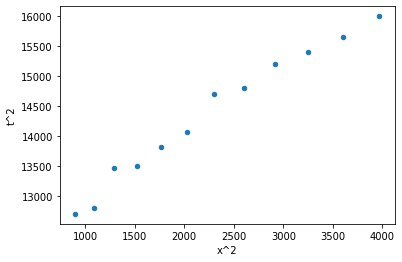

In [8]:
df.plot.scatter(x="x^2", y="t^2")

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [10]:
x_sq = df["x^2"].values.reshape(-1,1)
lr.fit(x_sq, df["t^2"])

LinearRegression()

In [11]:
lr.coef_, lr.intercept_

(array([1.08366112]), 11878.255357117452)

(0.0, 20000.0)

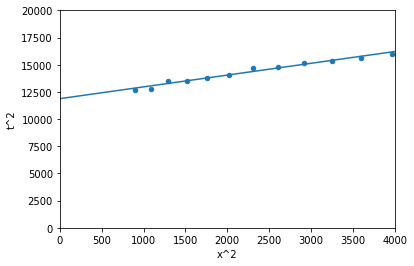

In [13]:
df.plot.scatter(x="x^2", y="t^2")

x=np.linspace(0,4000,10)
plt.plot(x, lr.coef_[0] * x + lr.intercept_)
plt.xlim([0,4000])
plt.ylim([0,20000])

In [14]:
V = 1/np.sqrt(lr.coef_[0])
V

0.9606236064089303

In [15]:
h = np.sqrt(lr.intercept_) * V / 2
h

52.3479390239865